In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
class BetaDistribution:
    def __init__(self, alpha, beta_param):
        self.alpha = alpha
        self.beta = beta_param

    def pdf(self, x):
        B = np.math.gamma(self.alpha) * np.math.gamma(self.beta) / np.math.gamma(self.alpha + self.beta)
        return (x**(self.alpha - 1) * (1 - x)**(self.beta - 1)) / B

    def cdf(self, x):
        return np.array([self._beta_cdf_single(val) for val in x])

    def _beta_cdf_single(self, x):
        result = 0.0
        for k in range(self.alpha):
            result += (np.math.comb(self.alpha + self.beta - 1, k) * (x**(k + self.alpha)) * ((1 - x)**(self.beta - k - 1)))
        return result

def plot_pdf(x_values, pdf1, pdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1, label=label1, color='blue', linestyle='-')
    plt.plot(x_values, pdf2, label=label2, color='red', linestyle='-')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_cdf(x_values, cdf1, cdf2, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, cdf1, label=label1, color='blue', linestyle='-')
    plt.plot(x_values, cdf2, label=label2, color='red', linestyle='-')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_comparison(x_values, pdf1_scipy, pdf1_custom, label1, label2, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf1_scipy, label=label1, color='blue', linestyle='--')
    plt.plot(x_values, pdf1_custom, label=label2, color='orange', linestyle='-')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Parameters for two beta distributions
alpha1, beta1 = 2, 5
alpha2, beta2 = 5, 2

# Generate x values (in the range [0, 1])
x_beta = np.linspace(0, 1, 1000)

# Calculate the PDF and CDF using scipy
pdf1_scipy = beta.pdf(x_beta, alpha1, beta1)
pdf2_scipy = beta.pdf(x_beta, alpha2, beta2)
cdf1_scipy = beta.cdf(x_beta, alpha1, beta1)
cdf2_scipy = beta.cdf(x_beta, alpha2, beta2)

# Create instances of BetaDistribution
beta1_dist = BetaDistribution(alpha1, beta1)
beta2_dist = BetaDistribution(alpha2, beta2)

# Calculate PDF and CDF using custom class
pdf1_custom = np.array([beta1_dist.pdf(x) for x in x_beta])
pdf2_custom = np.array([beta2_dist.pdf(x) for x in x_beta])

cdf1_custom = beta1_dist.cdf(x_beta)
cdf2_custom = beta2_dist.cdf(x_beta)

/tmp/ipykernel_1200160/3370054627.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  B = np.math.gamma(self.alpha) * np.math.gamma(self.beta) / np.math.gamma(self.alpha + self.beta)
/tmp/ipykernel_1200160/3370054627.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  result += (np.math.comb(self.alpha + self.beta - 1, k) * (x**(k + self.alpha)) * ((1 - x)**(self.beta - k - 1)))
/tmp/ipykernel_1200160/3370054627.py:16: RuntimeWarning: divide by zero encountered in scalar power
  result += (np.math.comb(self.alpha + self.beta - 1, k) * (x**(k + self.alpha)) * ((1 - x)**(self.beta - k - 1)))


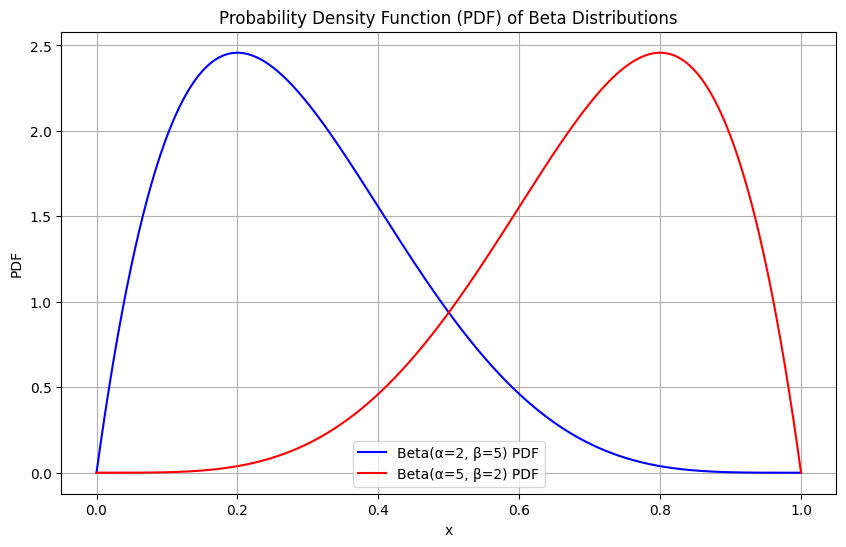

In [4]:
# Plot 1: PDF of Beta Distributions (Original)
plot_pdf(x_beta, pdf1_scipy, pdf2_scipy, 
         label1=f'Beta(α={alpha1}, β={beta1}) PDF', 
         label2=f'Beta(α={alpha2}, β={beta2}) PDF', 
         title='Probability Density Function (PDF) of Beta Distributions')

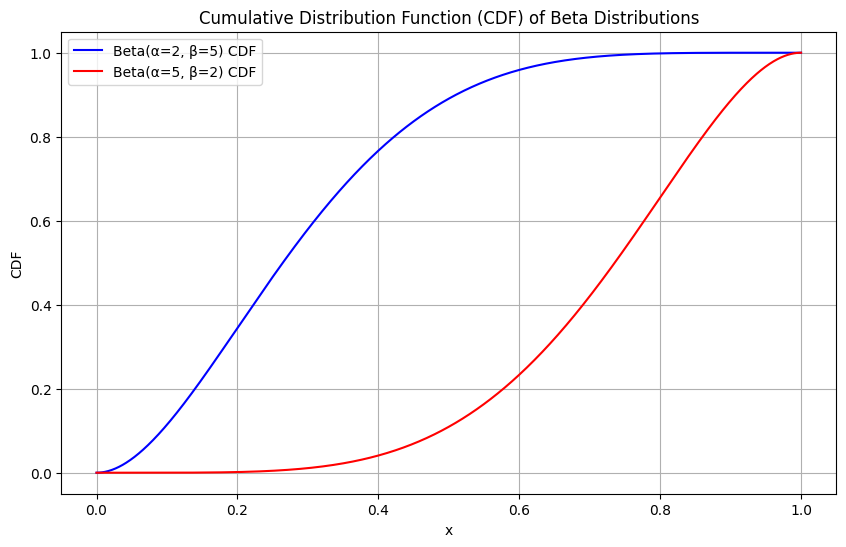

In [5]:
# Plot 2: CDF of Beta Distributions (Original)
plot_cdf(x_beta, cdf1_scipy, cdf2_scipy, 
         label1=f'Beta(α={alpha1}, β={beta1}) CDF', 
         label2=f'Beta(α={alpha2}, β={beta2}) CDF', 
         title='Cumulative Distribution Function (CDF) of Beta Distributions')

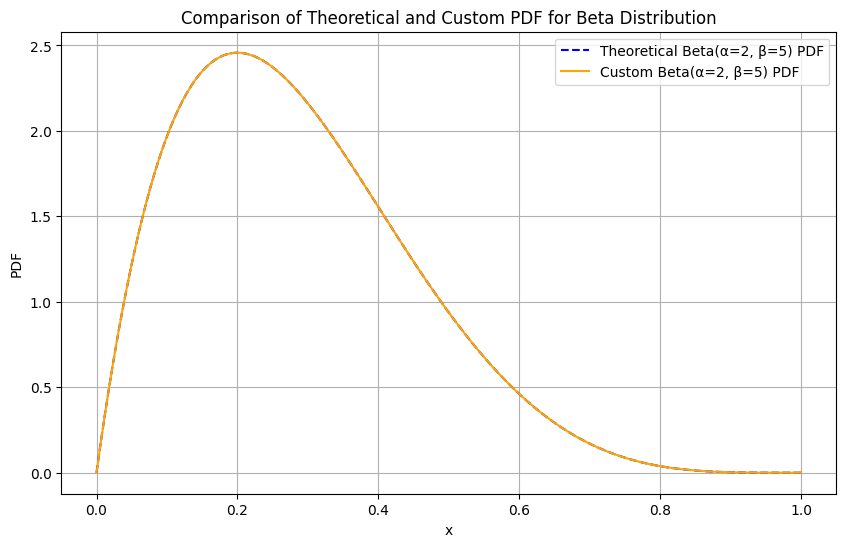

In [6]:
# Plot 3: Comparison of Theoretical and Custom PDFs
plot_comparison(x_beta, pdf1_scipy, pdf1_custom, 
                label1=f'Theoretical Beta(α={alpha1}, β={beta1}) PDF', 
                label2=f'Custom Beta(α={alpha1}, β={beta1}) PDF', 
                title='Comparison of Theoretical and Custom PDF for Beta Distribution')